# 🧪 Experiment: Solving the XOR Problem

 **Objective:** Demonstrate that Micrograd can solve non-linear classification problems.

The **XOR (Exclusive OR)** function is a classic problem in machine learning history.
It outputs `1` if the inputs are different, and `0` if they are the same.

| Input A | Input B | XOR Output | Target (SVM) |
| :---: | :---: | :---: | :---: |
| 0 | 0 | 0 | -1 |
| 0 | 1 | 1 | 1 |
| 1 | 0 | 1 | 1 |
| 1 | 1 | 0 | -1 |

**Why is this interesting?**
The XOR problem is **not linearly separable**. You cannot draw a single straight line to separate the positive cases from the negative ones. A simple Linear Regression or a single-layer Perceptron would fail here (50% accuracy). To solve it, we need a **Multi-Layer Perceptron (MLP)** with a hidden layer and non-linear activation functions (ReLU).

In [12]:
%pip install -r ../requirements.txt
%pip install -e ../

Note: you may need to restart the kernel to use updated packages.
Obtaining file:///Users/mirko/Developer/LearningMicrograd
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for micrograd (pyproject.toml) ... done
  Created wheel for micrograd: filename=micrograd-0.1.0-0.editable-py3-none-any.whl size=3766 sha256=06b3761ff3714b3bb37490c56a96201d0598c40a31618cb25fe69cb06f1812de
  Stored in directory: /private/var/folders/p8/f0ql1fmx0yqbsmkfmx969hpm0000gn/T/pip-ephem-wheel-cache-plh5fz9l/wheels/a6/60/b3/d9423b3db2435b547becb98798b3a4fc99cf8a693d459fdbf3
Successfully built micrograd
  Attempting uninstall: micrograd
    Found existing installation: micrograd 0.1.0
    Uninstalling micrograd-0.1.0:
      Successfully uninstalled micrograd-0.1.0
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from micrograd import Value
from micrograd import MLP

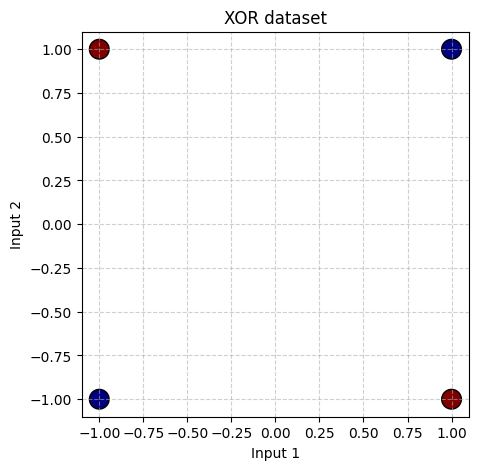

In [14]:
# Define the XOR dataset
X = [
    [-1.0, -1.0], # Corresponds to 0,0
    [-1.0,  1.0], # Corresponds to 0,1
    [ 1.0, -1.0], # Corresponds to 1,0
    [ 1.0,  1.0]  # Corresponds to 1,1
]

# Targets: 1 for different inputs, -1 for same inputs
y = [-1.0, 1.0, 1.0, -1.0]

# Visualize the problem
plt.figure(figsize=(5,5))
plt.scatter([x[0] for x in X], [x[1] for x in X], c=y, s=200, cmap='jet', edgecolors='k')
plt.title("XOR dataset")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [15]:
# Initialize the Neural Network
# We need at least one hidden layer to solve non-linear problems.

# - Input: 2 neurons
# - Hidden Layer: 8 neurons (ReLU activated)
# - Output: 1 neuron (Linear)
model = MLP(2, [8, 1]) 

print("Model architecture:")
print(model)
print(f"Total parameters: {len(model.parameters())}")

Model architecture:
MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [LinearNeuron(8)]]
Total parameters: 33


In [16]:
# Training Loop

# Hyperparameters
epochs = 100
learning_rate = 0.5  # Aggressive LR for this small problem

print("Starting training...")

for k in range(epochs):
    
    # Forward pass
    # Convert inputs to Value objects
    inputs = [list(map(Value, xrow)) for xrow in X]
    
    # Get predictions
    scores = list(map(model, inputs))
    
    # Compute loss (Max-Margin)
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(y, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    
    total_loss = data_loss + reg_loss
    
    # Backward pass
    model.zero_grad()
    total_loss.backward()
    
    # Update parameters
    for p in model.parameters():
        p.data -= learning_rate * p.grad
        
    # Calculate accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(y, scores)]
    acc = sum(accuracy) / len(accuracy)
    
    if k % 10 == 0 or k == epochs - 1:
        print(f"Step {k}: loss {total_loss.data:.4f}, accuracy {acc*100:.0f}%")

print("Training finished.")

Starting training...
Step 0: loss 0.9936, accuracy 50%
Step 10: loss 0.0639, accuracy 100%
Step 20: loss 0.0013, accuracy 100%
Step 30: loss 0.0013, accuracy 100%
Step 40: loss 0.0013, accuracy 100%
Step 50: loss 0.0013, accuracy 100%
Step 60: loss 0.0013, accuracy 100%
Step 70: loss 0.0013, accuracy 100%
Step 80: loss 0.0013, accuracy 100%
Step 90: loss 0.0013, accuracy 100%
Step 99: loss 0.0013, accuracy 100%
Training finished.


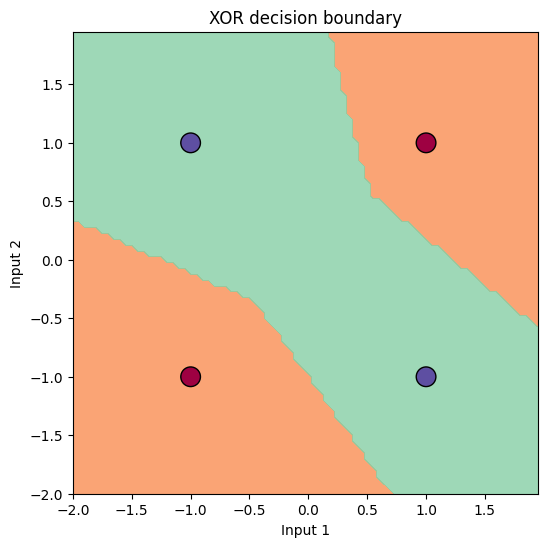

In [17]:
# Visualize the decision boundary

h = 0.05
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))

Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter([x[0] for x in X], [x[1] for x in X], c=y, s=200, cmap=plt.cm.Spectral, edgecolors='k')
plt.title("XOR decision boundary")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()

### Conclusion

As shown in the plot above, the `micrograd` engine successfully learned a non-linear decision boundary (the red/blue regions) to separate the XOR states. 

The hidden layer allowed the network to transform the input space into a representation where the classes became linearly separable for the final output neuron.